# Krypton XY Lifetime maps

## SM: Single Map (in time). 

### Author: GML, JAH, JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Thu Oct 11 10:09:52 2018


### Logger

In [2]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')


2018-10-11 10:09:53,883 | INFO : Hello world!


### Input files

In [73]:
from krcal.core.kr_types import KrFileName
input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
map_path    = f"$IC_DATA/maps"

#input_file_names  = ['dst_6347_trigger1_0000_9672.h5',
#                     'dst_6348_trigger1_0000_9488.h5',
#                     'dst_6349_trigger1_0000_9562.h5',
#                    'dst_6350_trigger1_0000_9564.h5',
#                     'dst_6351_trigger1_0000_9580.h5',
#                    'dst_6352_trigger1_0000_9838.h5',
#                     'dst_6353_trigger1_0000_9453.h5']

input_file_names  = ['dst_6350_trigger1_0000_9564.h5',
                     'dst_6351_trigger1_0000_9580.h5',
                     'dst_6352_trigger1_0000_9838.h5',
                     'dst_6353_trigger1_0000_9453.h5']

output_file_name  = ' '
map_file_name     = 'kr_maps_xy_6350_6353.h5'
map_file_name_ts  = 'kr_maps_xy_ts_6350_6353.h5'
emap_file_name    = 'kr_emap_xy_6350_6353.h5'


krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_file_name)

### Notebook configuration

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [6]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units

In [7]:
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts

In [8]:
from krcal.core.histo_functions    import h1, h1d, h2, h2d, plot_histo

In [9]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import NN
from krcal.core                     import fit_functions_ic as fitf

In [10]:
from krcal.core.plt_functions  import plot_sector
from krcal.core.plt_functions  import plot_sectors

In [11]:
from krcal.core.stat_functions      import mean_and_std

In [12]:
from krcal.core.analysis_functions  import kr_ranges_and_bins
from krcal.core.analysis_functions  import fiducial_volumes
from krcal.core.analysis_functions  import fid_eff
from krcal.core.analysis_functions  import select_rphi_sectors
from krcal.core.analysis_functions  import select_xy_sectors
from krcal.core.analysis_functions  import event_map

from krcal.core.analysis_functions  import kr_event_selection
from krcal.core.analysis_functions  import kr_event

In [13]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_rphi_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map_rphi
from krcal.core.fit_lt_functions    import fit_map_xy
from krcal.core.fit_lt_functions    import get_time_series

In [14]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy
from krcal.core.fit_lt_histograms   import plot_time_fcs
from krcal.core.fit_lt_histograms    import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_histograms    import print_fit_lifetime

In [15]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName


In [16]:
from krcal.core.rphi_maps_functions   import draw_wedges
from krcal.core.rphi_maps_functions   import define_rphi_sectors
from krcal.core.rphi_maps_functions   import rphi_sector_alpha_map
from krcal.core.rphi_maps_functions   import rphi_sector_map_def
from krcal.core.rphi_maps_functions   import draw_maps_rphi

In [17]:
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import draw_maps
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import draw_xy_maps
from krcal.core.map_functions   import draw_xy_map
from krcal.core.map_functions   import draw_xy_maps_ts
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [18]:
import krcal.dev.corrections       as corrections 


In [19]:
from numpy import pi, sqrt

In [20]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [21]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Logger

In [22]:
log = logging.getLogger()

### Input/output 

In [74]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [75]:
fn

KrFileName(input_file_names=['/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6350_trigger1_0000_9564.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6351_trigger1_0000_9580.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6352_trigger1_0000_9838.h5', '/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6353_trigger1_0000_9453.h5'], output_file_name='/Users/jjgomezcadenas/Projects/ICDATA/ldst/ ', map_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_6350_6353.h5', map_file_name_ts='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_ts_6350_6353.h5', emap_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_emap_xy_6350_6353.h5')

In [25]:
dst           = load_dsts(fn.input_file_names, "DST", "Events")

In [26]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {len(dst)}")

Total number of events: 3938450


In [27]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [28]:
dst_time = dst.sort_values('event')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [29]:
RMAX      = 200
RCORE     = 100
s1e_range = (3, 25)
s2e_range = (2000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range = (5000, 14000)
lt_range = (1000, 6000)
c2_range = (0,5)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 100,
                                                        ynbins    = 100,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [30]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

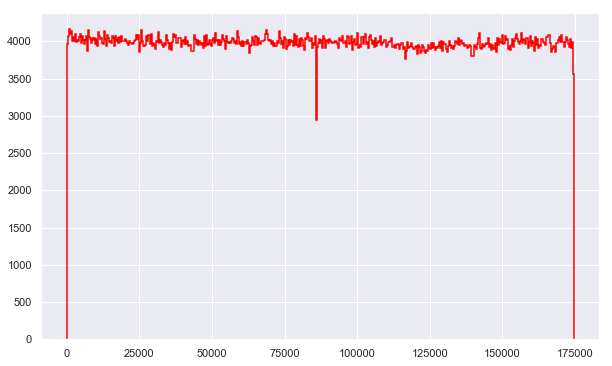

In [31]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

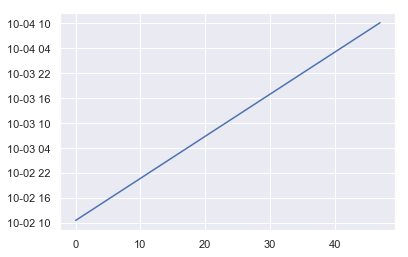

In [32]:
plt.plot(krTimes.timeStamps)

### Event distribution

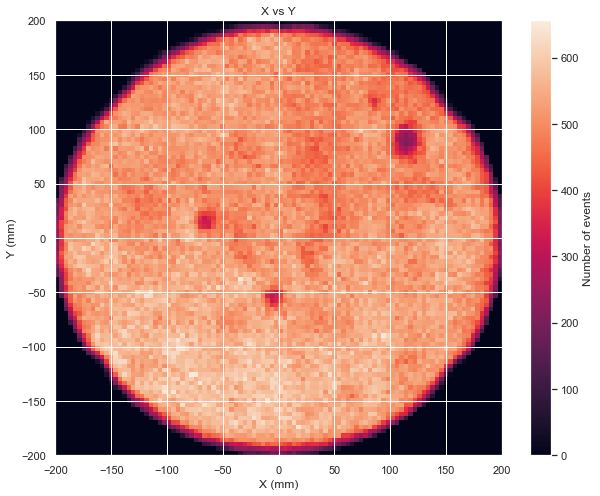

In [33]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

## Time series

In [34]:
log.setLevel(logging.INFO)

### Divide dst in 100 time series

In [35]:
nt = 100
t0 = time.time()

ts, masks = get_time_series(nt, DT[-1], kge)  
t1 = time.time()
print(f' get_time_series: t = {t1 -t0}')

 get_time_series: t = 0.7253992557525635


### Fit lifetime full detector

In [36]:
t0 = time.time()
fps = time_fcs(ts, masks, kge, 
               nbins_z = 15,
               nbins_e = 25,
               range_z = (10, 550),
               range_e = (7000, 14000),
               energy  = 'S2e',
               fit     = FitType.profile)
t1 = time.time()
print(f' time_fcs: t = {t1 -t0}')

 time_fcs: t = 2.1755290031433105


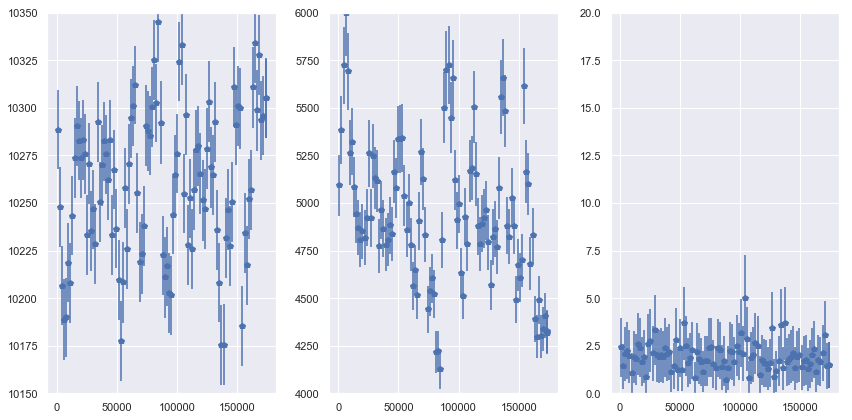

In [37]:
plot_time_fcs(fps,
              range_chi2  = (0,20),
              range_e0    = (10150,10350),
              range_lt    = (4000, 6000),
              figsize     = (12,6))

## Lifetime in RPhi

In [39]:
NSECTORS =5  # number of sectors in R. Each sector then is 200 / 5 = 40 cm.
SPHI     =90 # size of the phi pie-slice in degrees, thus 10 slices in phi.

In [40]:
rpsmd = rphi_sector_map_def(nSectors=NSECTORS, rmax=RMAX, sphi=SPHI)

In [41]:
W = define_rphi_sectors(rpsmd)

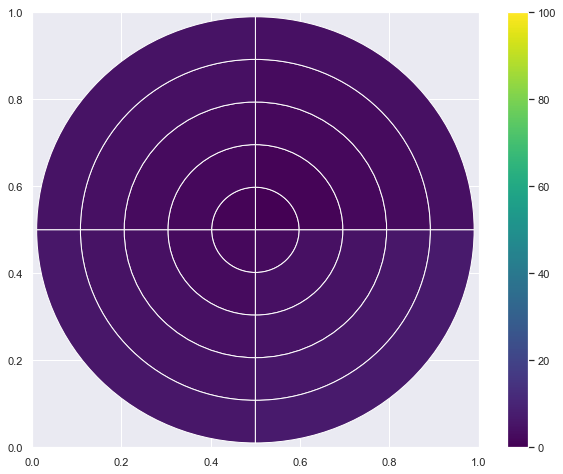

In [42]:
draw_wedges(W,  rmax = RMAX, 
            scale= 0.49, figsize=(10,8), alpha=1.0,
            cr =range(NSECTORS))

In [43]:
t0 = time.time()
KRES = select_rphi_sectors(dst, DT, dst.S2e, dst.S2q, W)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

 KRES: t = 5.702544927597046


In [44]:
neM = event_map(KRES)

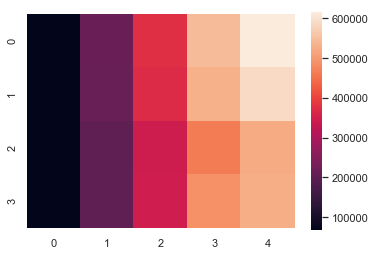

In [45]:
ax = sns.heatmap(neM, square=True)

### four phi sectors: upper half (left-right), lower half (left-right) of chamber

### R < 40 mm

In [46]:
erange = (7500,12500)
ltrange = (3000, 5500)
time_bins = 100

In [47]:
fps = fit_fcs_in_rphi_sectors(sector = 0,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   = time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

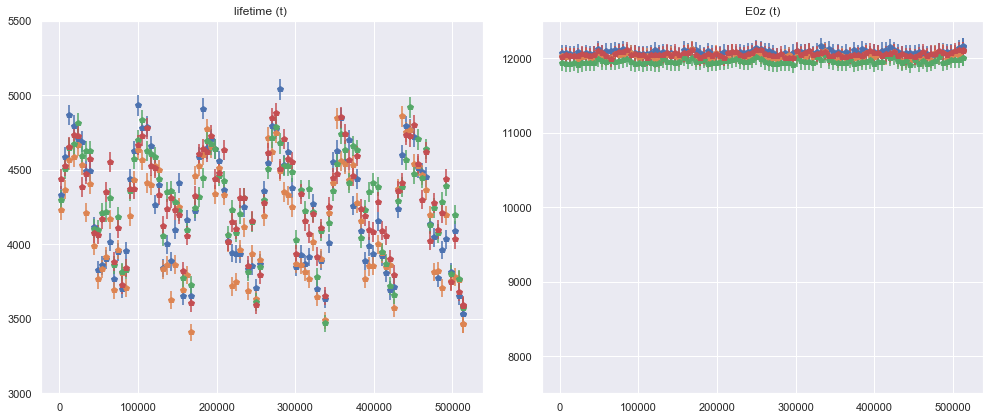

In [48]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 40 < R < 80

In [49]:
fps = fit_fcs_in_rphi_sectors(sector = 1,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   = time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

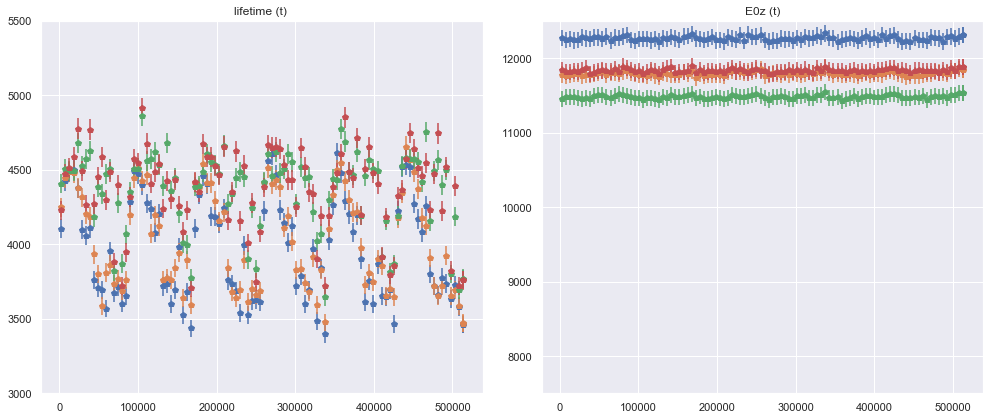

In [50]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 80 < R < 120

In [51]:
fps = fit_fcs_in_rphi_sectors(sector = 2,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   =time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

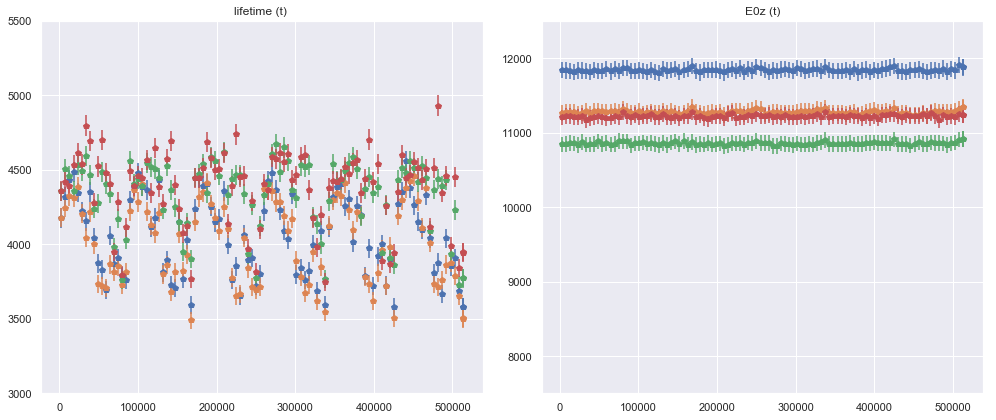

In [52]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 120 < R < 160

In [53]:
fps = fit_fcs_in_rphi_sectors(sector = 3,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   =time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

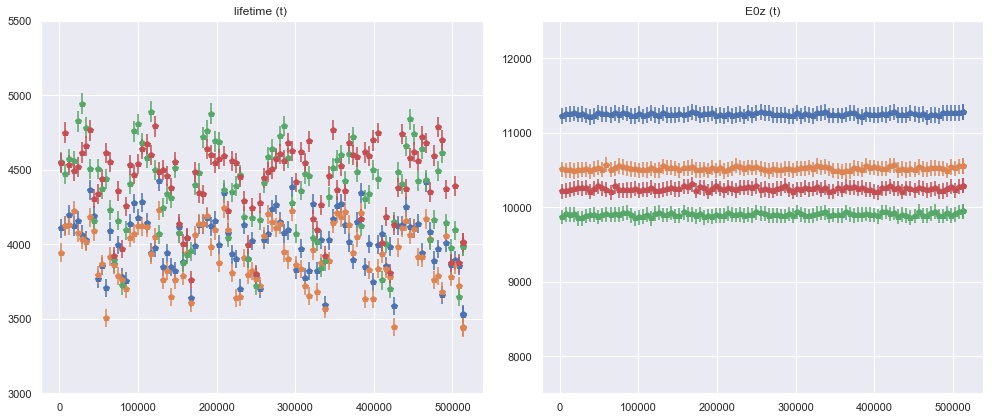

In [54]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=ltrange)

### 160 < R < 200

In [55]:
fps = fit_fcs_in_rphi_sectors(sector = 4,
                              selection_map = KRES,
                              event_map     = neM,
                              n_time_bins   =time_bins,
                              time_diffs    =DT,
                              nbins_z       = 25,
                              nbins_e       = 50,
                              range_z       =(50, 550),
                              range_e       = (5000, 13500),
                              energy        = 'S2e',
                              fit           = FitType.unbined,
                              n_min         = 100)

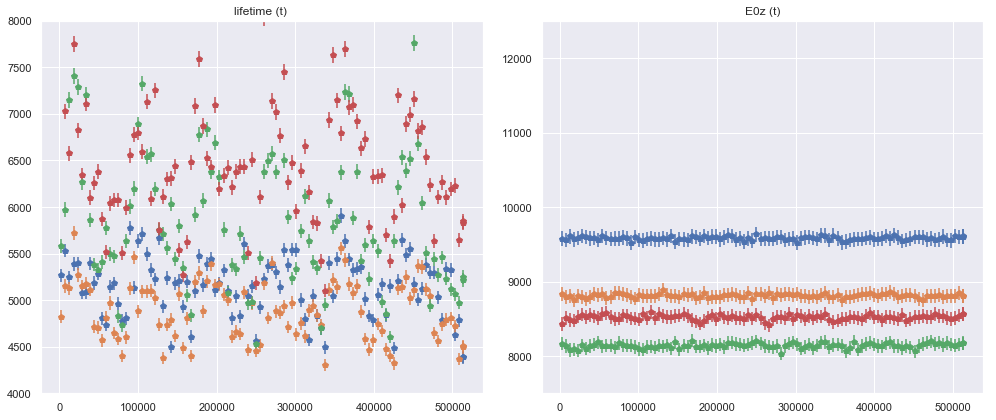

In [56]:
plot_fit_sectors(fps,  range_e0 =erange, range_lt=(4000, 8000))

### Lifetime patterns:

- Oscillatory pattern in time with a swing of 1 ms!
- Lifetime changes also as a function of Phi, with differences that increase as R increases.
- R > 160 cm data shows very high and very variable lifetime, with a spread of several ms.

### Strategy

- Try to correct geometrical effects first. Fine grained geometrical map with a single time bin.
- Study time dependence later

## Divide chamber in sectors of XY

In [38]:
log.setLevel(logging.DEBUG)

In [39]:
t0 = time.time()
KRES = select_xy_sectors(dst, DT, dst.S2e.values, dst.S2q.values, krBins.X, krBins.Y)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

2018-10-11 10:11:24,024 | DEBUG :  function: select_xy_sectors
2018-10-11 10:11:24,025 | DEBUG :  calling selection_mask
2018-10-11 10:11:24,026 | DEBUG : computing selection mask for sector 0
2018-10-11 10:11:24,827 | DEBUG : computing selection mask for sector 1
2018-10-11 10:11:25,643 | DEBUG : computing selection mask for sector 2
2018-10-11 10:11:26,416 | DEBUG : computing selection mask for sector 3
2018-10-11 10:11:27,162 | DEBUG : computing selection mask for sector 4
2018-10-11 10:11:27,906 | DEBUG : computing selection mask for sector 5
2018-10-11 10:11:28,634 | DEBUG : computing selection mask for sector 6
2018-10-11 10:11:29,370 | DEBUG : computing selection mask for sector 7
2018-10-11 10:11:30,090 | DEBUG : computing selection mask for sector 8
2018-10-11 10:11:30,814 | DEBUG : computing selection mask for sector 9
2018-10-11 10:11:31,522 | DEBUG : computing selection mask for sector 10
2018-10-11 10:11:32,241 | DEBUG : computing selection mask for sector 11
2018-10-11 10

In [45]:
log.setLevel(logging.INFO)

In [46]:
neM = event_map(KRES)

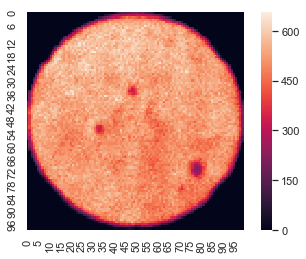

In [47]:
ax = sns.heatmap(neM, square=True)

## Fits in XY sectors

## Maps

#### fit maps. The object returned is a Dict[int, List[FitParTS]] where

```
@dataclass
class FitParTS:             # Fit parameters Time Series
    ts   : np.array          # contains the time series (integers expressing time differences)
    e0   : np.array          # e0 fitted in time series
    lt   : np.array
    c2   : np.array
    e0u  : np.array          # e0 error fitted in time series
    ltu  : np.arra`
```
Thus, each bin contains 6 time series; ts is time (time difference wrt to the start of the run); e0, lt... are fitted parameters to time slices.

### Single time bin

In [42]:
print(krNbins.Z,krNbins.S2e,z_range, e_range,)

15 25 (10, 550) (5000, 14000)


In [48]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 1,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.unbined,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 21.50030493736267


In [49]:
times = fpmxy[0][0].ts

In [50]:
times

[87311.0]

#### Obtain time maps from fmap: The object returned is a SectorMapTS
```
@dataclass
class SectorMapTS:  # Map in chamber sector containing time series of pars
    chi2  : Dict[int, List[np.array]]
    e0    : Dict[int, List[np.array]]
    lt    : Dict[int, List[np.array]]
    e0u   : Dict[int, List[np.array]]
    ltu   : Dict[int, List[np.array]]
```
Here the dictionary is arranged for each of the relevant variables.

In [51]:
tsm = tsmap_from_fmap(fpmxy)

<ErrorbarContainer object of 3 artists>

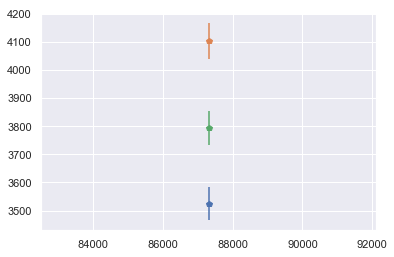

In [52]:
plt.errorbar(times, tsm.lt[25][25], np.sqrt(tsm.lt[25][25]), fmt="p")
plt.errorbar(times, tsm.lt[25][21], np.sqrt(tsm.lt[25][21]), fmt="p")
plt.errorbar(times, tsm.lt[25][22], np.sqrt(tsm.lt[25][22]), fmt="p")

<ErrorbarContainer object of 3 artists>

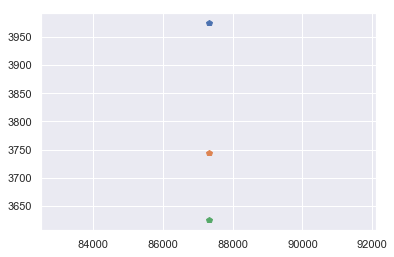

In [54]:
plt.errorbar(times, tsm.lt[30][10], np.sqrt(tsm.lt[6][10]), fmt="p")
plt.errorbar(times, tsm.lt[30][11], np.sqrt(tsm.lt[6][11]), fmt="p")
plt.errorbar(times, tsm.lt[30][12], np.sqrt(tsm.lt[6][12]), fmt="p")

### Obtain amap from tsm: The object returned is ASectorMap
```
@dataclass
class ASectorMap:  # Map in chamber sector containing average of pars
    chi2  : DataFrame
    e0    : DataFrame
    lt    : DataFrame
    e0u   : DataFrame
    ltu   : DataFrame
```
 

#### Example: map in the first time series

In [55]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [56]:
amap_average(am) 

ASectorMap(chi2=1.1135603184199057, e0=10056.965458693514, lt=3855.275066470451, e0u=30.891189836349216, ltu=164.79208247111382)

#### Get rid of outlayers that distort mean and error

In [57]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range, debug=True)

 set nans to average value of interval = 9500.0
 set nans to average value of interval = 3500.0
column 0
outlier found, index = 56, value =6211.570515084412
outlier found, index = 58, value =6802.521615275752
column 2
outlier found, index = 66, value =10172.992144360942
column 3
outlier found, index = 30, value =7493.74414311908
outlier found, index = 67, value =6236.15804751512
column 4
outlier found, index = 70, value =7096.21599219332
column 5
outlier found, index = 26, value =6808.206045279635
column 31
outlier found, index = 95, value =6863.360804780011
column 37
outlier found, index = 97, value =24629.208770688427
column 51
outlier found, index = 98, value =12972.244102977491
column 61
outlier found, index = 97, value =6334.276629912791
column 63
outlier found, index = 97, value =6715.369512758434
column 99
outlier found, index = 57, value =6809.7306426784135


In [58]:
amap_average(rmap)

ASectorMap(chi2=1.1135603184199057, e0=10056.965458693514, lt=3841.1692866323697, e0u=30.891189836349216, ltu=153.07771769230328)

In [59]:
asm = relative_errors(rmap)

In [68]:
amv = amap_average(asm)
amv

ASectorMap(chi2=1.1135603184199057, e0=10056.965458693514, lt=3841.1692866323697, e0u=0.3197587594411543, ltu=4.01034435095351)

#### Draw the maps using default colormap

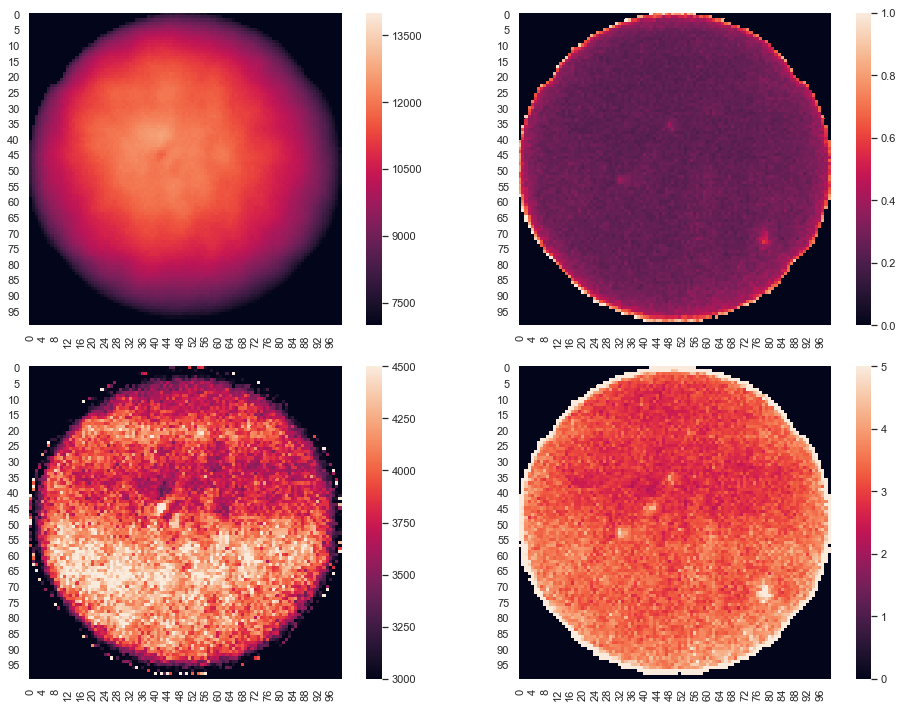

In [71]:
draw_xy_maps(asm,
            e0lims  = (7000, 14000),
            ltlims  = (3000, 4500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

In [69]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)

In [70]:
amap_average(asmAv)

ASectorMap(chi2=1.0881782907751534, e0=10241.244735326858, lt=3870.466695213109, e0u=0.30665045079459047, ltu=3.765809998776705)

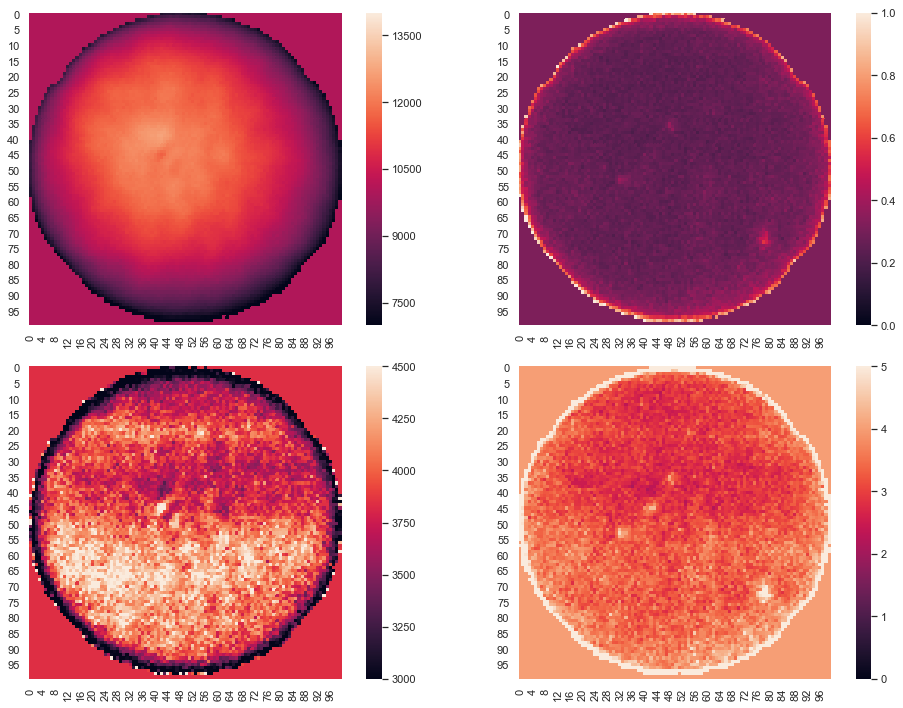

In [72]:
draw_xy_maps(asmAv,
            e0lims  = (7000, 14000),
            ltlims  = (3000, 4500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Save to file

In [77]:
write_maps(asmAv, filename=fn.emap_file_name)

### Read back

In [78]:
emaps = read_maps(filename=fn.emap_file_name)

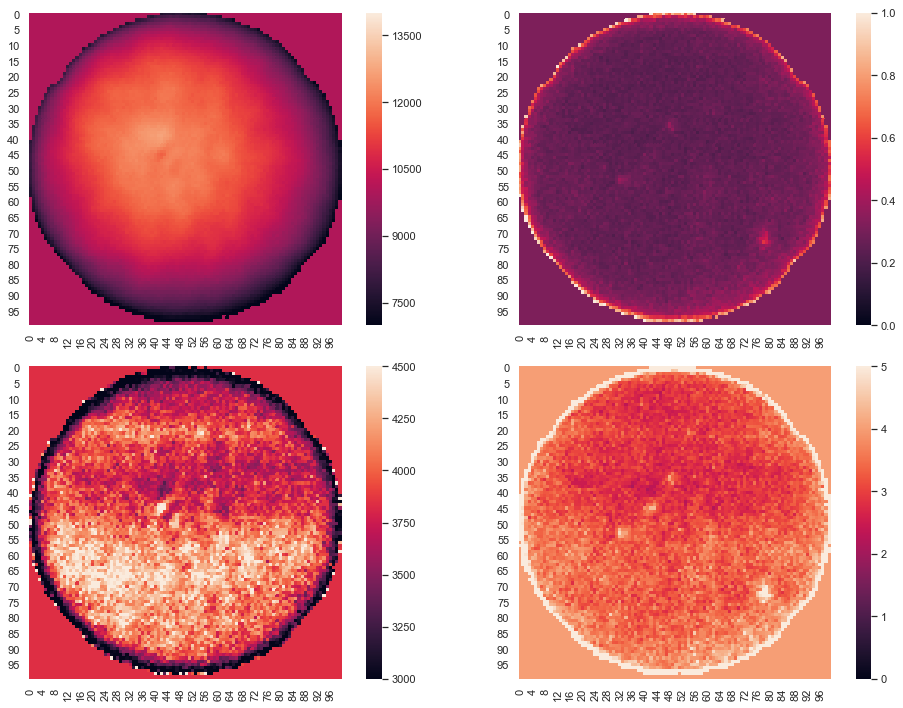

In [79]:
draw_xy_maps(emaps,
            e0lims  = (7000, 14000),
            ltlims  = (3000, 4500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Use several time intervals

In [80]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 5,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.profile,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 18.54988193511963


In [81]:
tsm = tsmap_from_fmap(fpmxy)

In [82]:
times = fpmxy[0][0].ts

In [83]:
times

[8698.5, 26095.5, 43492.5, 60889.5, 78286.5, 78287.5]

## Compute the average of maps

### Get all amaps (for each time interval). Maps returned are regularized and errors relative.

In [84]:
amaps = get_maps_from_tsmap(tsm, 
                            times   = times, 
                            erange  = e_range,
                            ltrange = lt_range,
                            c2range = c2_range)


In [85]:
len(amaps)

6

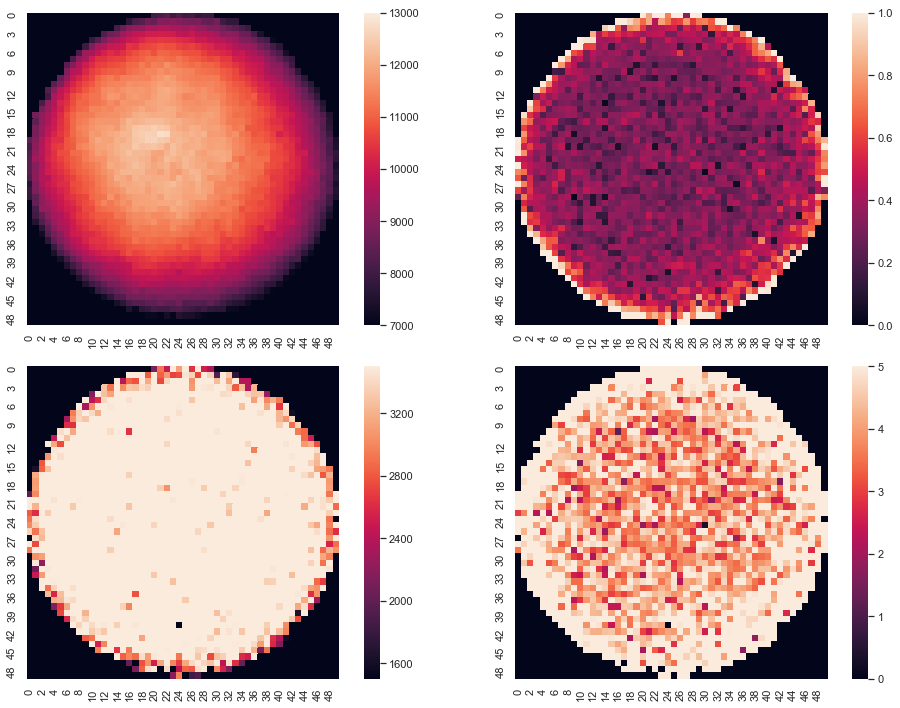

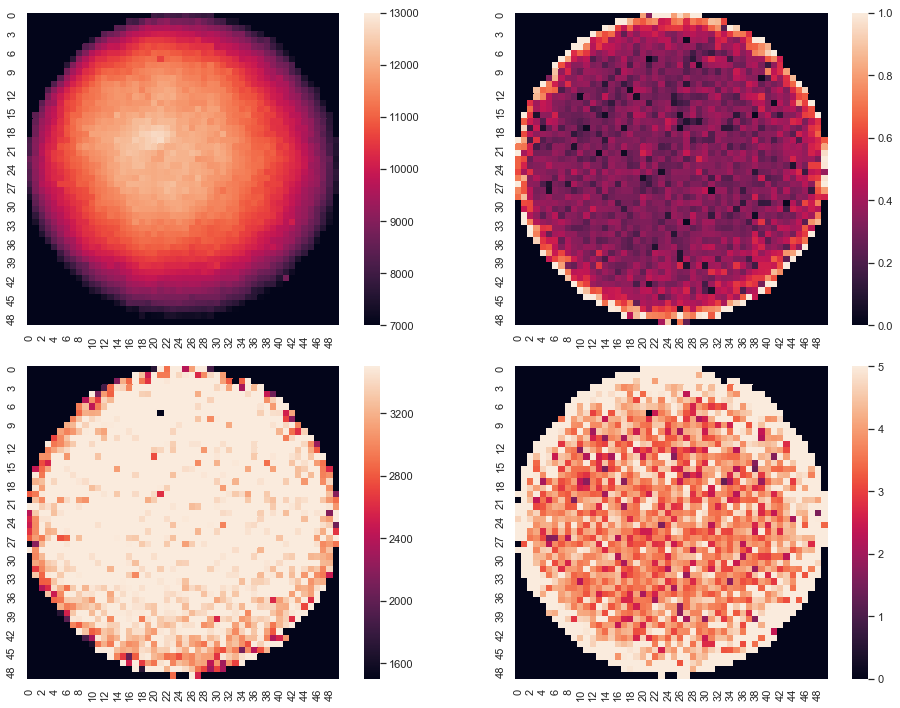

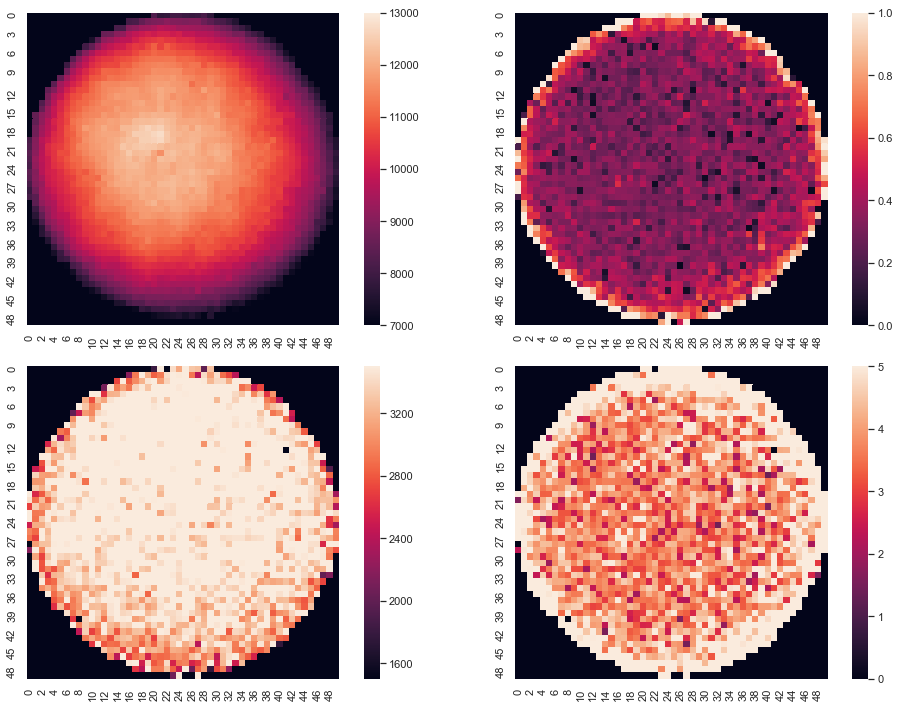

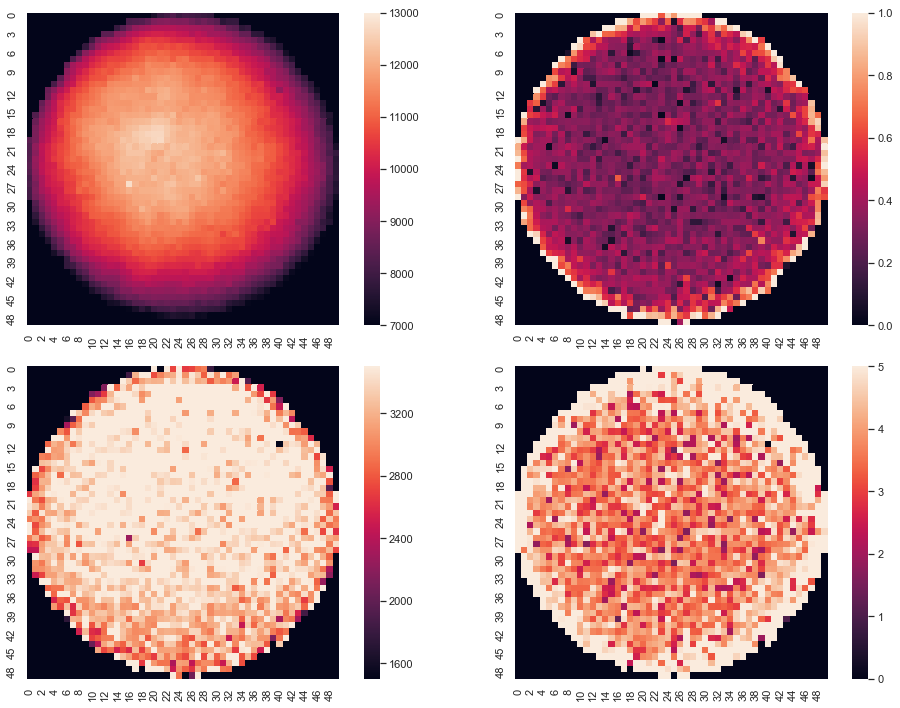

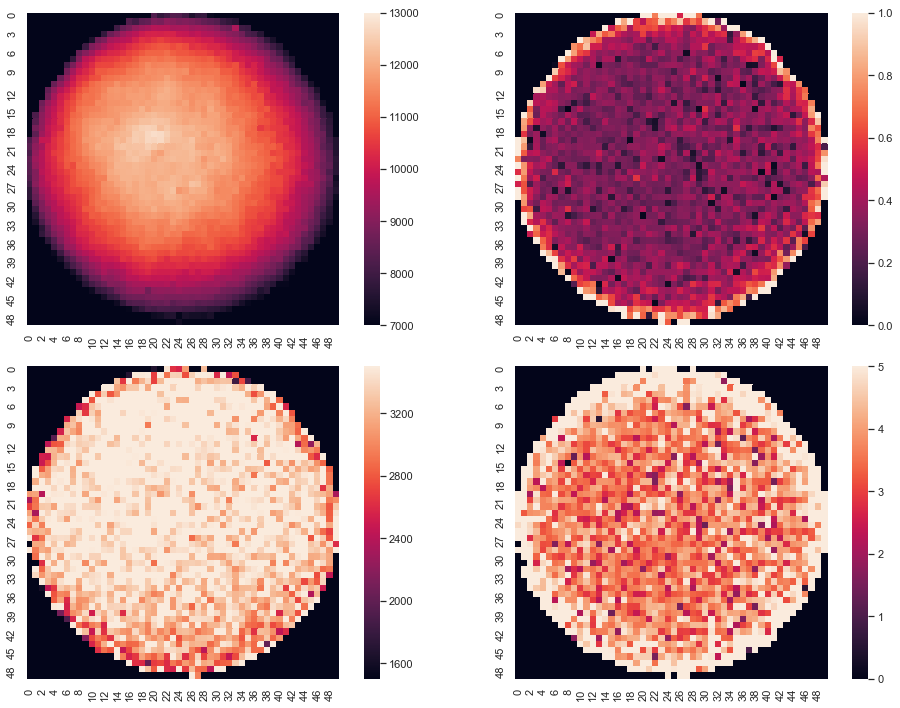

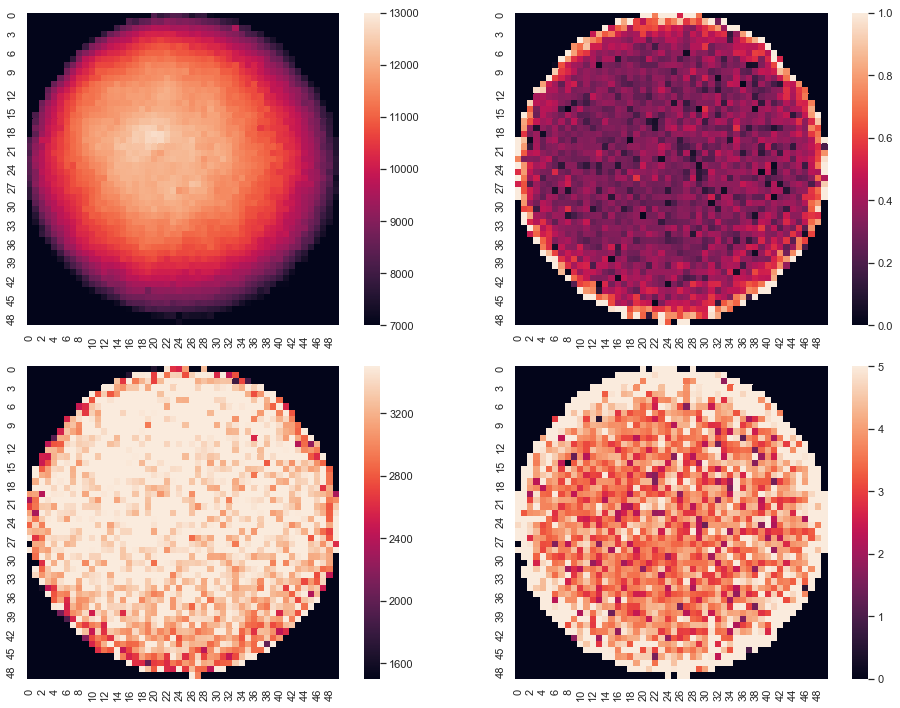

In [87]:
for amap in amaps:
    draw_xy_maps(amap,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            #cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [88]:
amAV = map_average(amaps)

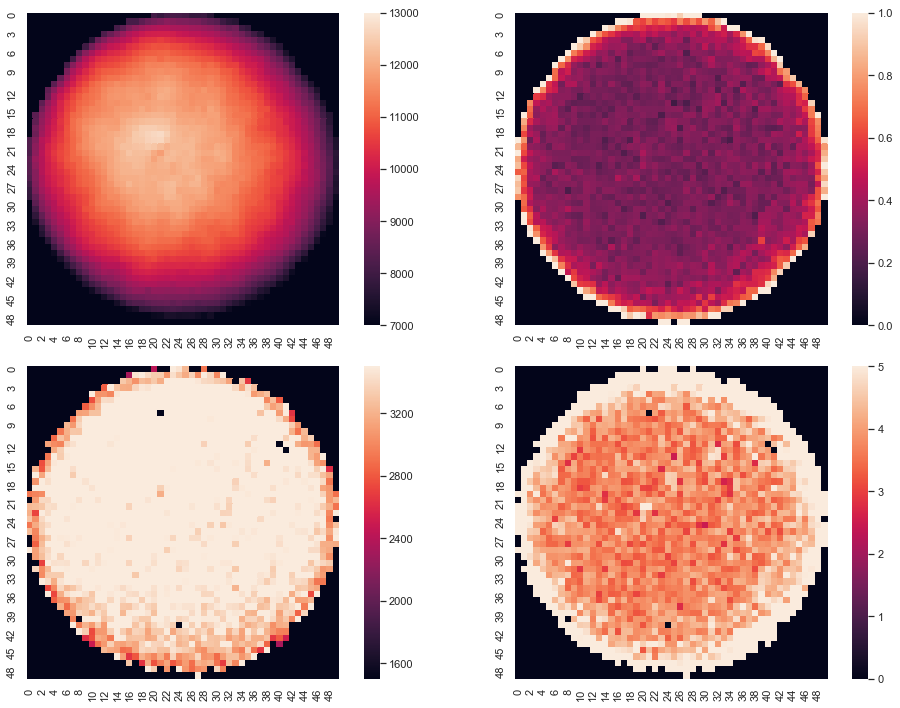

In [89]:
draw_xy_maps(amAV,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            #cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [90]:
amv = amap_average(amAV) 

In [91]:
amv

ASectorMap(chi2=2.058035431848866, e0=10072.206727079645, lt=3512.9519599972514, e0u=0.4466251546394842, ltu=5.127786400630234)

### Next, NaNs are replaced by the average values of the variables (this is needed for the corrections). 

In [92]:
amAV0 = amap_replace_nan_by_mean(amAV, amMean=amv)

In [93]:
amap_average(amAV0) 

ASectorMap(chi2=1.977849290305522, e0=10259.25954005605, lt=3537.1783820882265, e0u=0.42309628713013864, ltu=4.816466107133687)

In [94]:
amap_max(amAV0)

ASectorMap(chi2=49.104866141666854, e0=12730.131163550626, lt=4644.7228632930855, e0u=2.1989002710962375, ltu=44.16807936636317)

In [95]:
amap_min(amAV0)

ASectorMap(chi2=0.6333152227898368, e0=6490.789439126528, lt=2332.1567083838895, e0u=0.16923878990917007, ltu=2.499767918862034)

In [96]:
aMaps = []
for amap in amaps:
    amv = amap_average(amap) 
    aMaps.append(amap_replace_nan_by_mean(amap, amv))


### The maps can be saved to file

In [97]:
write_maps(amAV0, filename=fn.map_file_name)

### And retrieved from file

In [98]:
amap2 = read_maps(filename=fn.map_file_name)

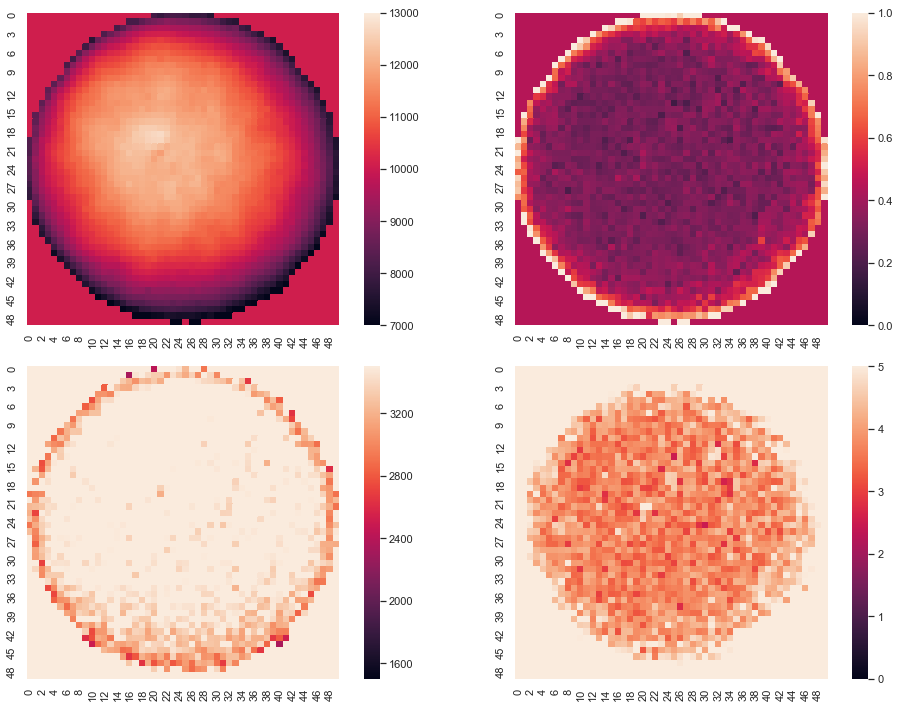

In [99]:
draw_xy_maps(amap2,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0, 1),
            lulims  = (0, 5),
            figsize=(14,10))

### To write the complete time-series of maps
```
write_maps_ts(aMaps : Iterable[ASectorMap], ts: np.array, filename : str)
```

In [100]:
write_maps_ts(aMaps, times, filename=fn.map_file_name_ts)

#### They can be read back

In [101]:
ts, tsMaps = read_maps_ts(fn.map_file_name_ts)

In [102]:
ts

0     8698.5
1    26095.5
2    43492.5
3    60889.5
4    78286.5
5    78287.5
dtype: float64

### One can plot the maps selected by type:

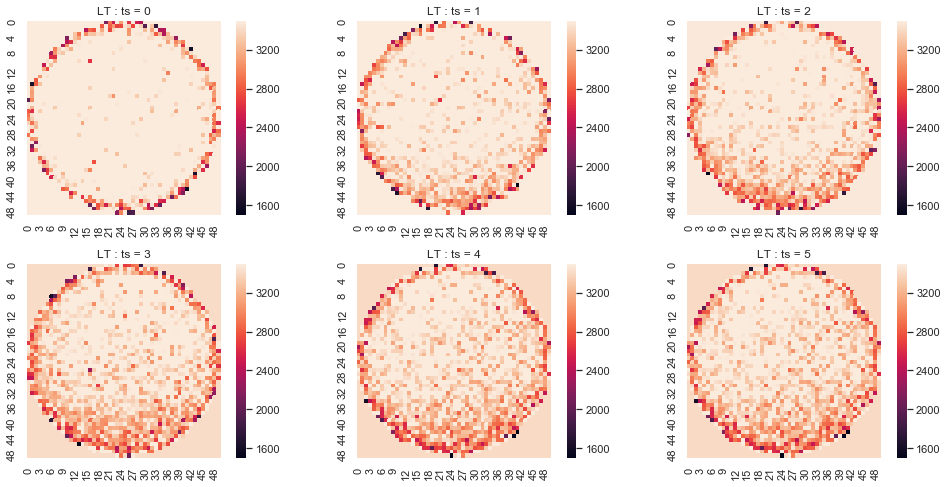

In [103]:
draw_xy_maps_ts(tsMaps,   
                wmap    = MapType.LT,
                ltlims  = (1500, 3500),
                figsize = (14,10))

### From this collection one would imagine that it is neccessary to correct using time-depende maps. 